# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("/home/cacaprog/learning-projects/us-medical-insurance-cost/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Investigate the costs for men and women

female_costs = data.charges[data.sex == 'female']
male_costs = data.charges[data.sex == 'male']
fem_costs_mean = np.mean(female_costs)
male_costs_mean = np.mean(male_costs)

print('The costs mean for men: $', np.round(male_costs_mean))
print('The costs mean for women: $', np.round(fem_costs_mean))
print('Female insurance costs are $', np.round(fem_costs_mean - male_costs_mean), 'cheapter than man\'s costs')

The costs mean for men: $ 13957.0
The costs mean for women: $ 12570.0
Female insurance costs are $ -1387.0 cheapter than man's costs


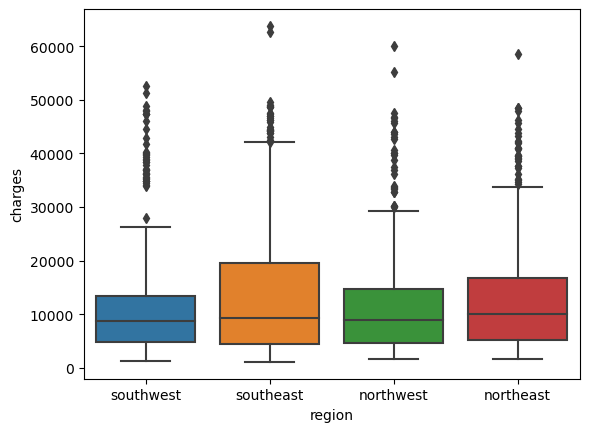

In [7]:
sns.boxplot(data = data, x = 'region', y = 'charges')
plt.show()

In [8]:
# Investigate the costs per region for smokers and no smokers

smoker = data[data.smoker == 'yes']
no_smoker = data[data.smoker == 'no']
smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


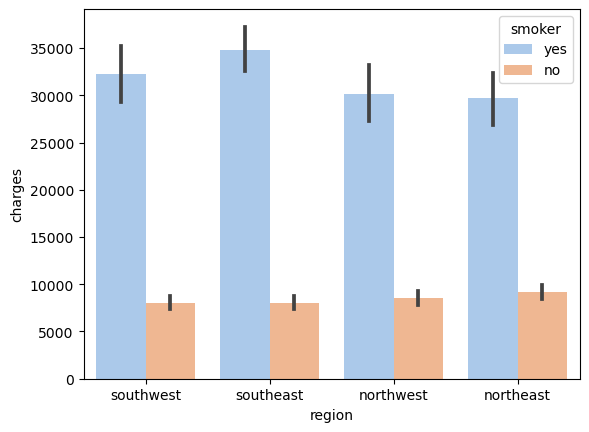

In [9]:
sns.barplot(x = 'region', y= 'charges', hue = 'smoker', data=data, palette='pastel')
plt.show()

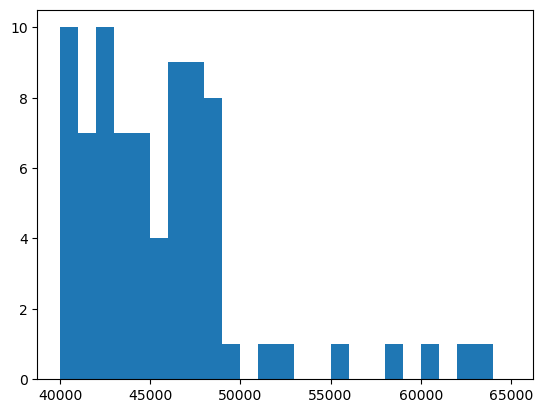

In [10]:
plt.clf()
plt.hist(data.charges, range=(40000, 65000), bins = 25)
plt.show()

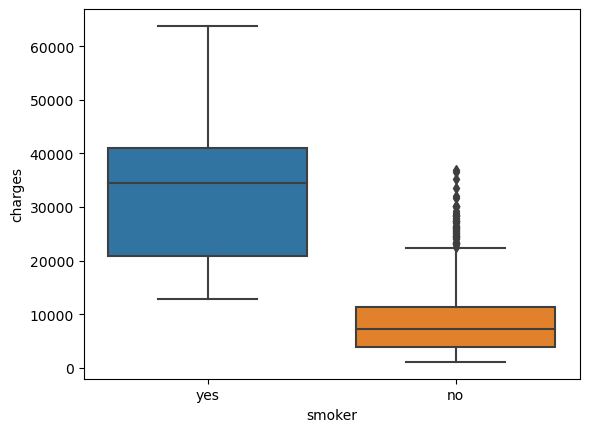

In [11]:
plt.clf()
sns.boxplot(data = data, x = 'smoker', y = 'charges')
plt.show()

In [42]:
def smok_region_mean(region):
    smok_mean = np.round(np.mean(smoker.charges[smoker.region == region]))
    print('The mean for smokers on', region, ': $', smok_mean)

smok_region_mean('southwest')
smok_region_mean('southeast')
smok_region_mean('northwest')
smok_region_mean('northeast')


The mean for smokers on southwest : $ 32269.0
The mean for smokers on southeast : $ 34845.0
The mean for smokers on northwest : $ 30192.0
The mean for smokers on northeast : $ 29674.0


In [58]:
def no_smok_region_mean(region):
    no_smok_mean = np.round(np.mean(no_smoker.charges[no_smoker.region == region]))
    print('The mean for non-smokers on', region, ': $', no_smok_mean)

no_smok_region_mean('southwest')
no_smok_region_mean('southeast')
no_smok_region_mean('northwest')
no_smok_region_mean('northeast')

The mean for non-smokers on southwest : $ 8019.0
The mean for non-smokers on southeast : $ 8032.0
The mean for non-smokers on northwest : $ 8556.0
The mean for non-smokers on northeast : $ 9166.0


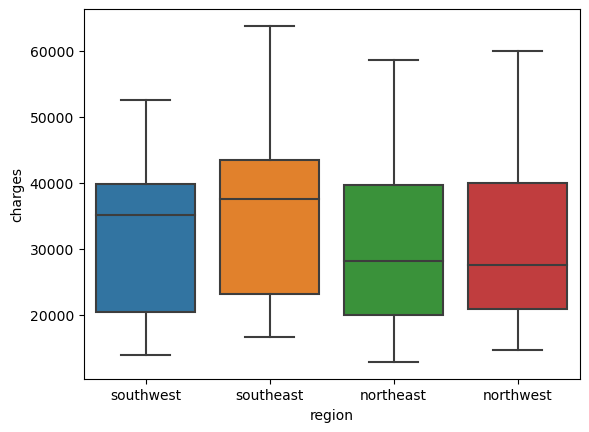

In [14]:
# Smoker charges by region
plt.clf()
sns.boxplot(data = smoker, x = 'region', y = 'charges')
plt.show()

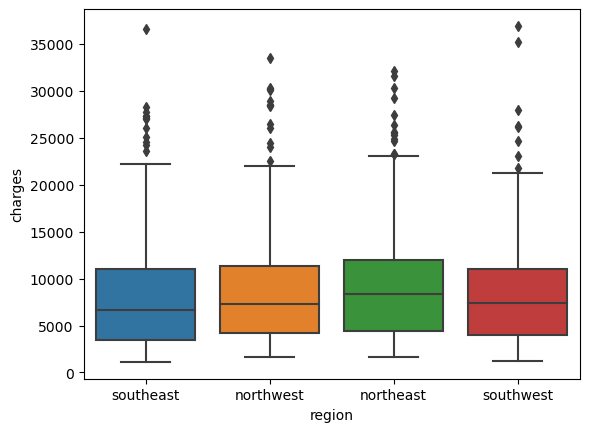

In [15]:
# Non-Smoker charges by region
plt.clf()
sns.boxplot(data = no_smoker, x = 'region', y = 'charges')
plt.show()

3. How many people are obese (%)?
And how much they pay for insurance?

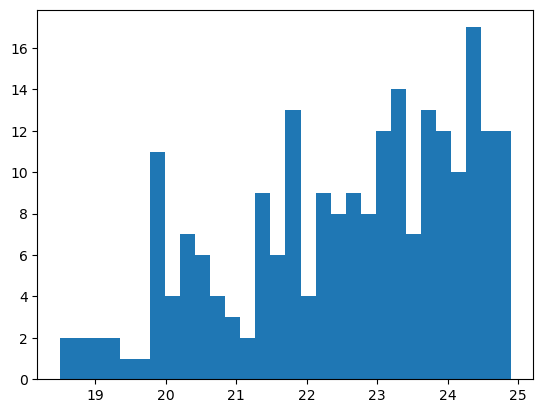

In [16]:
plt.clf()
plt.hist(data.bmi, range=(18.5, 24.9), bins = 30)
plt.show()

In [17]:
# Healthy people with BMI between 18.5 - 24.9

healthy_bmi = data['bmi'].between(18.5, 24.9, inclusive=True)
healthy_bmi.value_counts()


/tmp/ipykernel_237/561040605.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  healthy_bmi = data['bmi'].between(18.5, 24.9, inclusive=True)


False    1116
True      222
Name: bmi, dtype: int64

In [18]:
# Obese people with BMI >= 30

obese_bmi = data[(data.bmi >= 30)]
obese_bmi.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
6,46,female,33.44,1,no,southeast,8240.5896
12,23,male,34.40,0,no,southwest,1826.8430
13,56,female,39.82,0,no,southeast,11090.7178


In [19]:
print(len(obese_bmi) / len(data) * 100, '% have a BMI equal or higher than 30')

52.84005979073244 % have a BMI equal or higher than 30


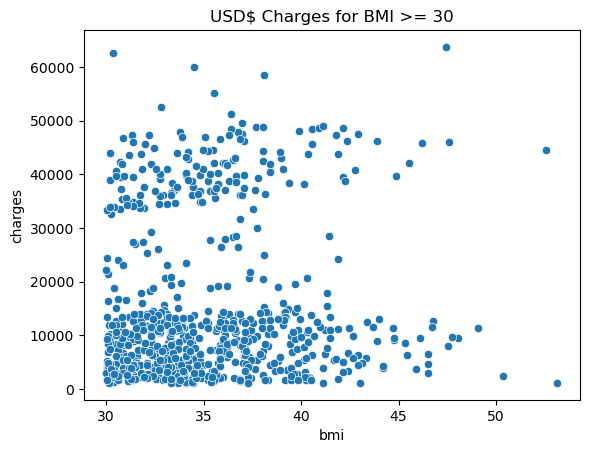

In [20]:
plt.clf()
sns.scatterplot(x = 'bmi', y = 'charges', data = obese_bmi)
plt.title('USD$ Charges for BMI >= 30')
plt.show()

In [21]:
print('The mean charges for obese people are $ ', np.round(np.mean(obese_bmi['charges'])))

The mean charges for obese people are $  15552.0


In [22]:
obese_bmi.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,707.000000,707,707.000000,707.000000,707,707,707.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,373,NaN,NaN,562,243,NaN
mean,40.343706,NaN,35.266011,1.106082,NaN,NaN,15552.335469
std,14.397704,NaN,4.074970,1.190760,NaN,NaN,14552.321382
min,18.000000,NaN,30.000000,0.000000,NaN,NaN,1131.506600
25%,27.000000,NaN,32.110000,0.000000,NaN,NaN,5194.658800
50%,41.000000,NaN,34.320000,1.000000,NaN,NaN,9964.060000
75%,53.000000,NaN,37.415000,2.000000,NaN,NaN,20068.166695


4. What features are the most influential for an individual’s medical insurance charges?

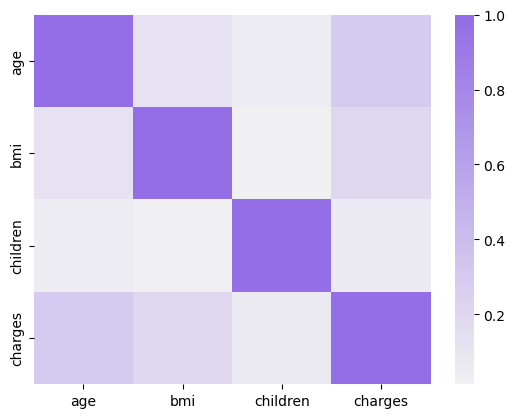

In [ ]:
plt.clf()
# Define the colormap which maps the data values to the color space defined with the diverging_palette method  
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True) 
# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(data.corr(), center=0, cmap=colors, robust=True)
plt.show()

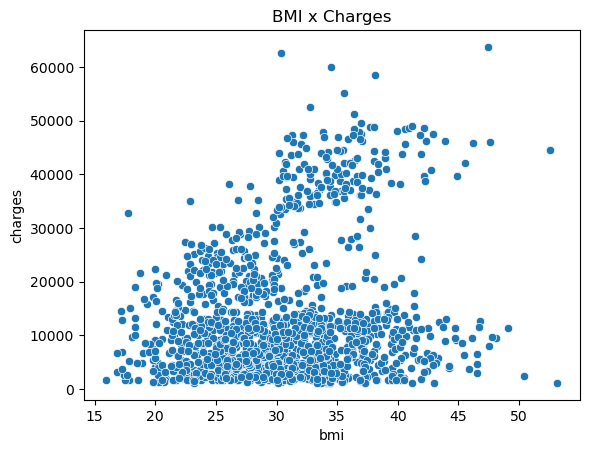

In [ ]:
plt.clf()
sns.scatterplot(x = 'bmi', y= 'charges', data = data)
plt.title('BMI x Charges')
plt.show()

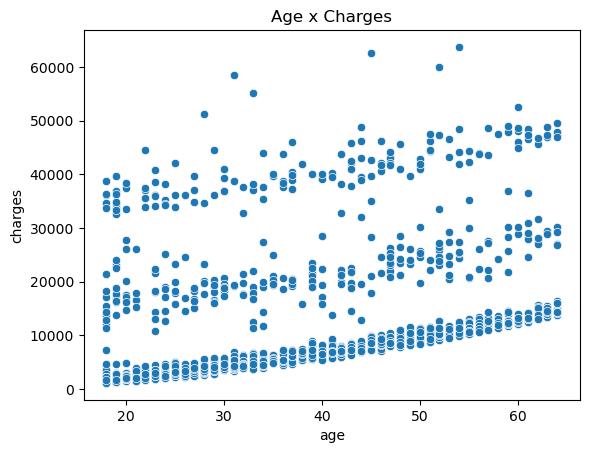

In [ ]:
plt.clf()
sns.scatterplot(x = 'age', y= 'charges', data = data)
plt.title('Age x Charges')
plt.show()

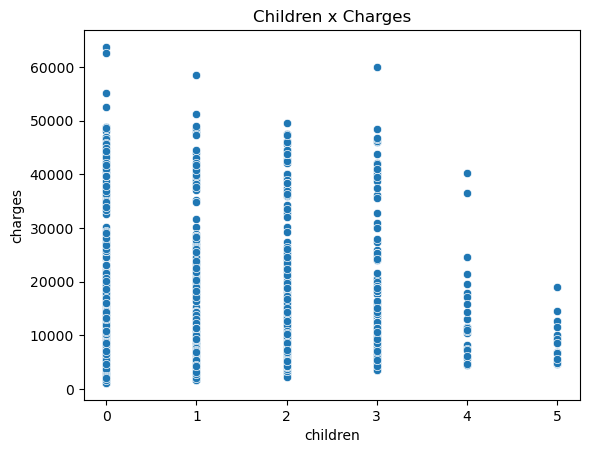

In [ ]:
plt.clf()
sns.scatterplot(x = 'children', y= 'charges', data = data)
plt.title('Children x Charges')
plt.show()

Age and BMI are correlated for charges